In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from DTHelper import experiment, NUM_TRIALS

# Importing and Preparing Dataset

In [2]:
# Import red and white wine datasets
wine_quality_red = pd.read_csv('./WineQuality/winequality-red.csv', sep=';')
wine_quality_white = pd.read_csv('./WineQuality/winequality-white.csv', sep=';')

wine_quality_red['is_white'] = -1
wine_quality_white['is_white'] = 1

wine_quality = pd.concat([wine_quality_red, wine_quality_white])

wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-1


In [3]:
# Remove columns we are not using, keeping only Result, UFE.1, UFE.2
wine_quality = wine_quality[['alcohol', 'density', 'is_white']]
wine_quality.columns = ['Alcohol', 'Density', 'IsWhite']

# Drop all rows with NaN values
wine_quality = wine_quality.dropna()

wine_quality.head()

,Alcohol,Density,IsWhite
0,9.4,0.9978,-1
1,9.8,0.9968,-1
2,9.8,0.9970,-1
3,9.8,0.9980,-1
4,9.4,0.9978,-1


In [4]:
# Prepare data for training
X = wine_quality[['Alcohol', 'Density']].to_numpy()
Y = wine_quality['IsWhite'].to_numpy()

x_label = 'Alcohol'
y_label = 'Density'
pos_label = 'White'
neg_label = 'Red'

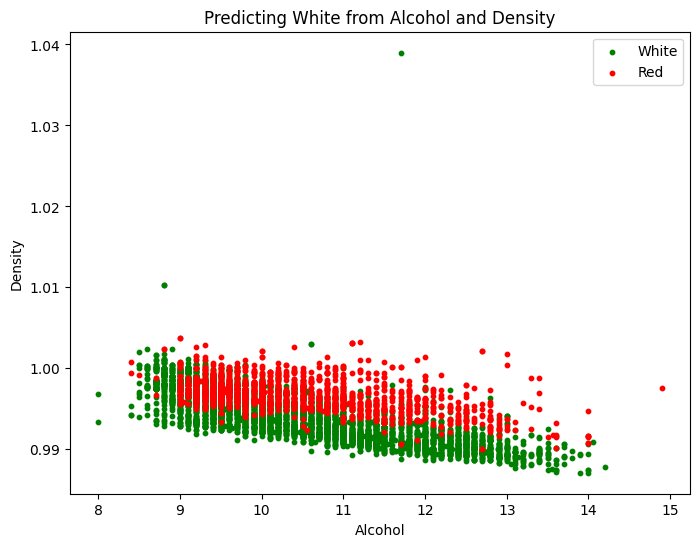

In [5]:
# Visualize the data
indices_pos1 = (Y == 1).nonzero()[0]
indices_neg1 = (Y == -1).nonzero()[0]
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],
            c='green', label=pos_label, s=10)
plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],
            c='red', label=neg_label, s=10)
plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'Predicting {pos_label} from {x_label} and {y_label}')
plt.show()

# 80% Training / 20% Testing

Trial 1


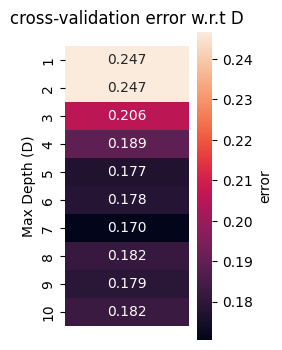

Optimal depth: 7
Optimal training error: 0.15778333654031174
Trial 2


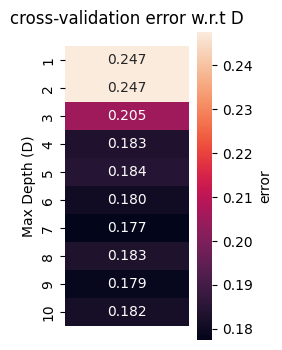

Optimal depth: 7
Optimal training error: 0.15605156821243027
Trial 3


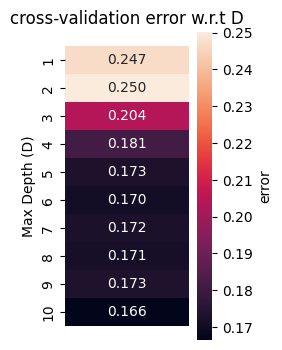

Optimal depth: 10
Optimal training error: 0.11756782759284201
Trial 4


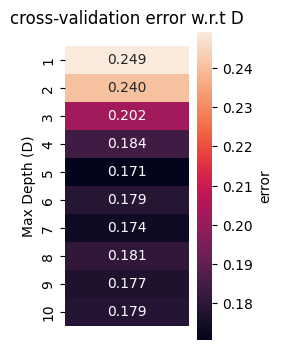

Optimal depth: 5
Optimal training error: 0.16336347893015202
Trial 5


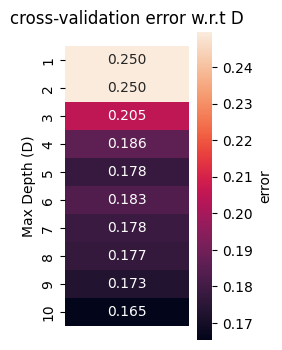

Optimal depth: 10
Optimal training error: 0.13103713680969786


In [6]:
# Run experiment with 20% test size
best_classifiers_82 = experiment(X, Y, test_size=0.2)

In [7]:
avg_test_error_82 = 0
for (key, value) in best_classifiers_82.items():
    print(f'D: {value['opt_D']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_82 += value['opt_e_testing']

avg_test_error_82 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_82}')

D: 7
Training Error: 0.15778333654031174
Test Error: 0.15846153846153843
D: 7
Training Error: 0.15605156821243027
Test Error: 0.16307692307692312
D: 10
Training Error: 0.11756782759284201
Test Error: 0.18538461538461537
D: 5
Training Error: 0.16336347893015202
Test Error: 0.17230769230769227
D: 10
Training Error: 0.13103713680969786
Test Error: 0.1676923076923077
Average Test Error: 0.16938461538461538


# 50% Training / 50% Testing

Trial 1


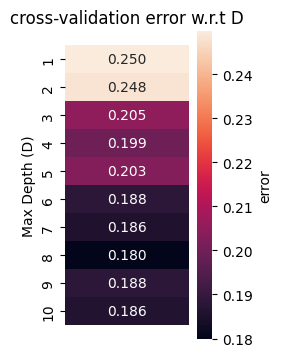

Optimal depth: 8
Optimal training error: 0.1400862068965517
Trial 2


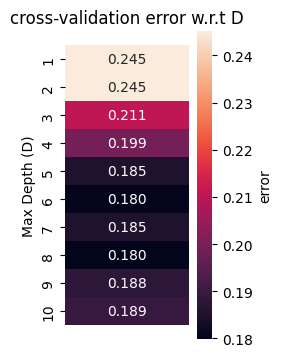

Optimal depth: 8
Optimal training error: 0.1413177339901478
Trial 3


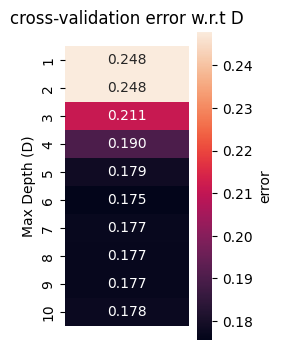

Optimal depth: 6
Optimal training error: 0.15732758620689657
Trial 4


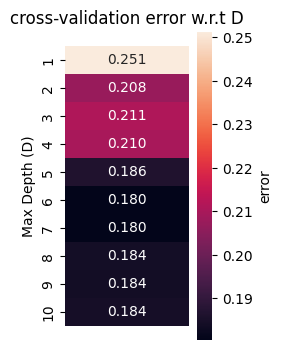

Optimal depth: 7
Optimal training error: 0.15394088669950734
Trial 5


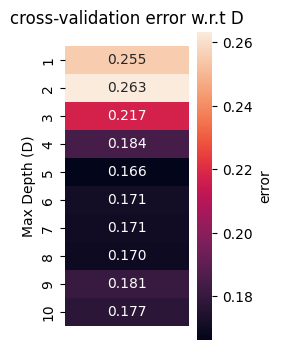

Optimal depth: 5
Optimal training error: 0.15979064039408863


In [8]:
# Run experiment with 50% test size
best_classifiers_55 = experiment(X, Y, test_size=0.5)

In [9]:
avg_test_error_55 = 0
for (key, value) in best_classifiers_55.items():
    print(f'D: {value['opt_D']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_55 += value['opt_e_testing']

avg_test_error_55 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_55}')

D: 8
Training Error: 0.1400862068965517
Test Error: 0.1668205601723607
D: 8
Training Error: 0.1413177339901478
Test Error: 0.16805170821791315
D: 6
Training Error: 0.15732758620689657
Test Error: 0.1745152354570637
D: 7
Training Error: 0.15394088669950734
Test Error: 0.18036318867343804
D: 5
Training Error: 0.15979064039408863
Test Error: 0.1745152354570637
Average Test Error: 0.17285318559556787


# 20% Training / 80% Testing

Trial 1


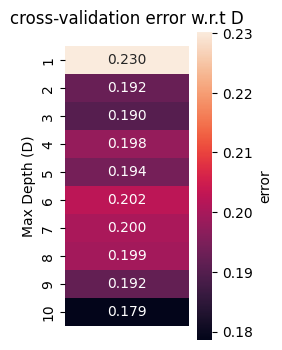

Optimal depth: 10
Optimal training error: 0.1208622016936105
Trial 2


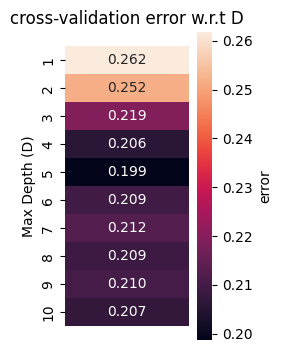

Optimal depth: 5
Optimal training error: 0.16628175519630484
Trial 3


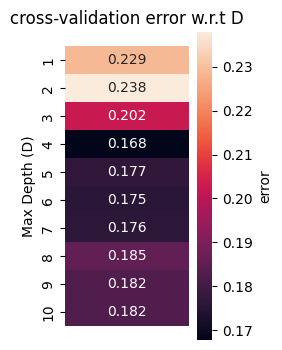

Optimal depth: 4
Optimal training error: 0.15704387990762125
Trial 4


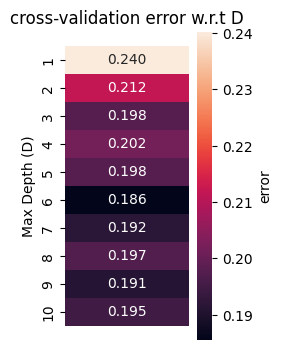

Optimal depth: 6
Optimal training error: 0.15935334872979212
Trial 5


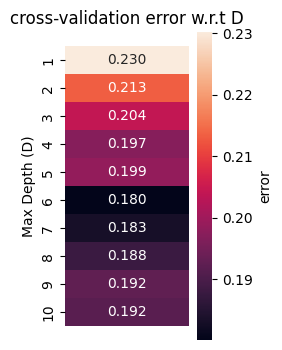

Optimal depth: 6
Optimal training error: 0.1524249422632794


In [10]:
# Run experiment with 80% test size
best_classifiers_28 = experiment(X, Y, 0.8)

In [11]:
avg_test_error_28 = 0
for (key, value) in best_classifiers_28.items():
    print(f'D: {value['opt_D']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_28 += value['opt_e_testing']

avg_test_error_28 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_28}')

D: 10
Training Error: 0.1208622016936105
Test Error: 0.2079646017699115
D: 5
Training Error: 0.16628175519630484
Test Error: 0.1798768757214313
D: 4
Training Error: 0.15704387990762125
Test Error: 0.19353597537514433
D: 6
Training Error: 0.15935334872979212
Test Error: 0.1937283570604078
D: 6
Training Error: 0.1524249422632794
Test Error: 0.18584070796460173
Average Test Error: 0.19218930357829933


# All Available Variables
- best_classifiers_82
- avg_test_error_82
- best_classifiers_55
- avg_test_error_55
- best_classifiers_28
- avg_test_error_28

Best Classifiers: Contains lowest training error (best-in-fold) classifiers from all trials

Average Test Error: Average test error of the best classifiers (lowest validation error) from each trial

In [12]:
print('Average Test Error for 20% Test Size: ', avg_test_error_82)
print('Average Test Error for 50% Test Size: ', avg_test_error_55)
print('Average Test Error for 80% Test Size: ', avg_test_error_28)

Average Test Error for 20% Test Size:  0.16938461538461538
Average Test Error for 50% Test Size:  0.17285318559556787
Average Test Error for 80% Test Size:  0.19218930357829933
